# Clonador de voz con IA

### Importamos las principales librerias

In [1]:
import pyttsx3
import numpy as np
import tensorflow as tf
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import pandas as pd
import IPython.display as ipd
from glob import glob
import os 
import seaborn as sns 
from itertools import cycle

### Tomamos la ruta 

In [2]:
data_dir='./Audios_training_clonador'
audio_files= glob(data_dir + './*wav')
audio_files

['./Audios_training_clonador.\\Amorcito_audio.wav',
 './Audios_training_clonador.\\Andrew_Audios (1).wav',
 './Audios_training_clonador.\\Andrew_Audios (12).wav',
 './Audios_training_clonador.\\Andrew_Audios (13).wav',
 './Audios_training_clonador.\\Andrew_Audios (14).wav',
 './Audios_training_clonador.\\Andrew_Audios (15).wav',
 './Audios_training_clonador.\\Andrew_Audios (16).wav',
 './Audios_training_clonador.\\Andrew_Audios (17).wav',
 './Audios_training_clonador.\\Andrew_Audios (18).wav',
 './Audios_training_clonador.\\Andrew_Audios (19).wav',
 './Audios_training_clonador.\\Andrew_Audios (20).wav',
 './Audios_training_clonador.\\Andrew_Audios (21).wav',
 './Audios_training_clonador.\\Andrew_Audios (35).wav',
 './Audios_training_clonador.\\Andrew_Audios (36).wav',
 './Audios_training_clonador.\\Andrew_Audios (37).wav',
 './Audios_training_clonador.\\Andrew_Audios (38).wav',
 './Audios_training_clonador.\\Andrew_Audios (39).wav',
 './Audios_training_clonador.\\Andrew_Audios (40).wav

In [3]:
audio_files= glob(data_dir + './*wav')
lista=[]
len(audio_files)

33

### Obtenemos los audios

In [4]:
for file in os.listdir('./Audios_training_clonador'):
    print(file)

Amorcito_audio.wav
Andrew_Audios (1).wav
Andrew_Audios (12).wav
Andrew_Audios (13).wav
Andrew_Audios (14).wav
Andrew_Audios (15).wav
Andrew_Audios (16).wav
Andrew_Audios (17).wav
Andrew_Audios (18).wav
Andrew_Audios (19).wav
Andrew_Audios (20).wav
Andrew_Audios (21).wav
Andrew_Audios (35).wav
Andrew_Audios (36).wav
Andrew_Audios (37).wav
Andrew_Audios (38).wav
Andrew_Audios (39).wav
Andrew_Audios (40).wav
Andrew_Audios (41).wav
Andrew_Audios (42).wav
Andrew_Audios (43).wav
Andrew_Audios (44).wav
Andrew_Audios (45).wav
Andrew_Audios (46).wav
Andrew_Audios (47).wav
Andrew_Audios (48).wav
Andrew_Audios (49).wav
Andrew_Audios (50).wav
Andrew_Audios (51).wav
Audio_definitivo_andrew.wav
audi_andrew_buenastardes.wav
juanse audio.wav
Stiven_audio.ogg
Stiven_audio.wav


In [5]:
#Reproducir audio 
ipd.Audio(audio_files[4])

In [6]:
def feature_extraction(lista):

    x, sample_rate= librosa.load(audio_files, res_type="kaiser_fast")
    mfcc= np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc =50).T, axis=0)

    return mfcc 

### Graficas de ondas

In [7]:
audio, sqref =lr.load(audio_files[4])
time= np.arange(0,len(audio)) / sqref

time

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       2.81337868e+00, 2.81342404e+00, 2.81346939e+00])

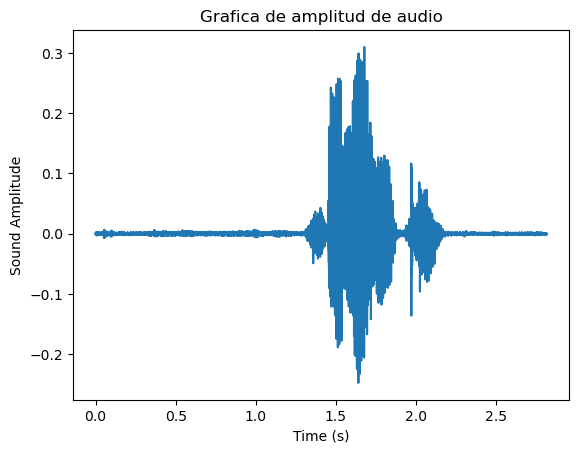

In [8]:
#graficar la onda de audio 
fig,ax = plt.subplots()
ax.plot(time,audio)
ax.set (xlabel='Time (s)', ylabel='Sound Amplitude',title="Grafica de amplitud de audio")
plt.show()

In [9]:
audio, sqref =lr.load(audio_files[0])
time= np.arange(0,len(audio)) / sqref

time

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       5.39733787e+01, 5.39734240e+01, 5.39734694e+01])

y:[ 2.8814995e-04 -1.6137201e-05 -5.8956794e-06  9.8514906e-04
  1.6943549e-03  1.4806868e-03  8.9833658e-04  1.0667385e-03
  1.4380014e-03  1.2647493e-03]
shape.y:(144946,)
sr:22050


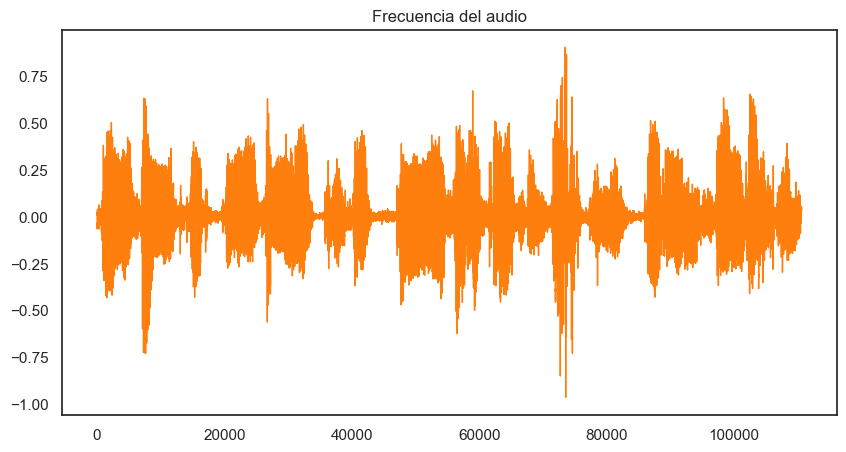

array([-0.05134733, -0.05745774, -0.065927  , ...,  0.03615246,
        0.03500054,  0.03734633], dtype=float32)

In [10]:
y, sr=lr.load(audio_files[-1])
print(f'y:{y[:10]}')
print(f'shape.y:{y.shape}')
print(f'sr:{sr}')
y_trimmed, _ =librosa.effects.trim(y, top_db=15)
sns.set_theme(style="white", palette=None)
color_pal= plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle= cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title="Frecuencia del audio",color=color_pal[1])
plt.show()
y_trimmed

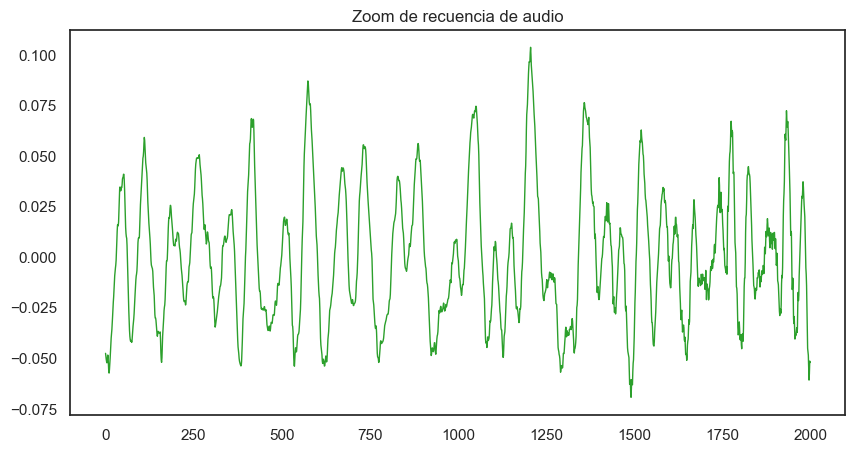

In [11]:
pd.Series(y[2000:4000]).plot(figsize=(10,5), lw=1, title="Zoom de recuencia de audio",color=color_pal[2])
plt.show()

### Espectrograma

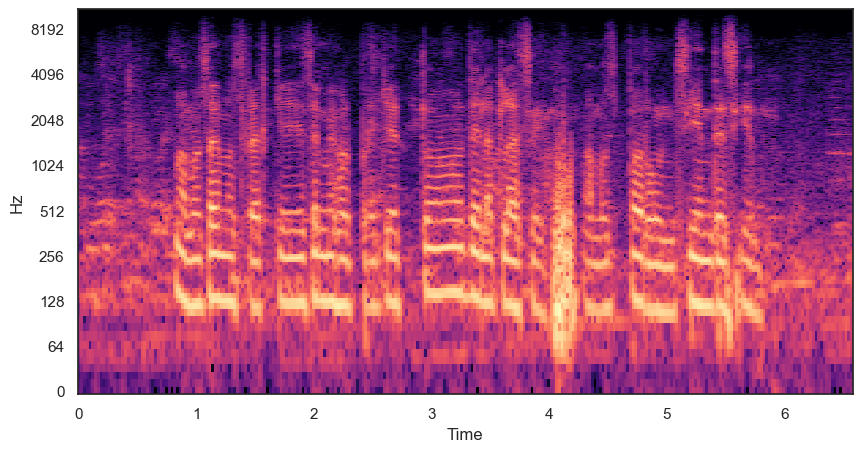

In [12]:
D = lr.stft(y) ## Shor time fourier transform
S_db= lr.amplitude_to_db(np.abs(D), ref=np.max) ## Amplitud a decibles(usado en tranformadas de audio conmunmente)
fig,ax = plt.subplots(figsize=(10,5))
img= lr.display.specshow(S_db, x_axis='time',y_axis='log',ax=ax)

In [13]:
s=librosa.feature.melspectrogram(y=y, sr=sr,n_mels=128)
s    ## melodia espectrograma

array([[2.9337208e-03, 1.9694893e-02, 4.4309307e-02, ..., 5.3111553e-02,
        4.9979962e-02, 1.7812535e-02],
       [3.6348015e-02, 2.4637707e-01, 2.2116913e-01, ..., 4.9160251e-01,
        7.9220814e-01, 2.8754178e-01],
       [8.7415583e-02, 2.6271588e-01, 1.8363200e-01, ..., 1.8068101e+00,
        1.0895170e+00, 4.6520773e-01],
       ...,
       [9.0657526e-09, 5.0503051e-09, 4.0344150e-09, ..., 1.0141298e-08,
        3.5444489e-07, 1.8576551e-06],
       [2.8697715e-09, 1.4693460e-09, 1.8048744e-09, ..., 3.3817937e-09,
        2.5987586e-07, 1.3923611e-06],
       [6.0386268e-10, 2.2862899e-10, 1.0317662e-10, ..., 1.0376319e-10,
        1.1472334e-07, 6.4123964e-07]], dtype=float32)

In [14]:

  

class AudioDataFixed: 
  def __init__(self):
    self.y = []
    self.d = []
    self.S_db=[]
    self.meanstft=[]
    self.y_trimmed=[]
    self.s=[]
    self.promedio=[]
    self.meany=[]
    self.meand=[]
    self.meanS_db=[]
    self.meany_trimmed=[]
    self.means=[]
    self.frecuency=[]
    
    

  def getAudioDataFrame(self):
    return {'Y' : self.y, 'Stft': self.meanstft, "Amplitud":self.S_db, "Trimmed":self.y_trimmed, "mel_frequency":self.s}

  def meandataframe(self):
    return{'Y':self.meany,'Stft':self.promedio,"Amplitud":self.meanS_db, "Trimmed":self.meany_trimmed,"Espectrograma":self.means,"Mel frequency":self.frecuency}
   
 
  
testAudios = AudioDataFixed()

for i in audio_files:
    #print('i:',i)
    y, sr=librosa.load(i)         ## direcion, url, array
    D = abs(lr.stft(y)) ## Short time fourier transform
    S_db= lr.amplitude_to_db(np.abs(D), ref=np.max) ## Amplitud a decibles(usado en tranformadas de audio conmunmente)
    s=librosa.feature.melspectrogram(y=y, sr=sr,n_mels=128)
    y_trimmed, _ =librosa.effects.trim(y, top_db=15)
    mfcc = lr.feature.mfcc(y=y, sr=sr, n_mfcc=15)
    magnitud=abs(D)
    testAudios.y.append(y)
    testAudios.d.append(D)
    testAudios.S_db.append(S_db)
    testAudios.y_trimmed.append(y_trimmed)
    testAudios.s.append(s)
    testAudios.means.append(np.mean(s))
    testAudios.meany.append(np.mean(y))
    testAudios.meand.append(abs(D))
    testAudios.meanS_db.append(np.mean(S_db))
    testAudios.frecuency.append(np.mean(mfcc))
    testAudios.meany_trimmed.append(np.mean(y_trimmed))
    testAudios.meanstft.append(D)
    testAudios.promedio.append(np.mean(D))
    

    


dfa=pd.DataFrame(testAudios.getAudioDataFrame())
def valor_salida():
  lista=[]
  for i in range(0,151):
    if(i>=100):
      salida=1
      lista.append(salida)
    elif(i<100):
      salida=0
      lista.append(salida)
  return lista

dfb=pd.DataFrame({"Output":valor_salida()})

dfc=pd.DataFrame(testAudios.meandataframe())
dfc


,Y,Stft,Amplitud,Trimmed,Espectrograma,Mel frequency
0,-4.029498e-05,0.466850,-71.984726,-0.000039,4.432943,-12.986269
1,-5.397707e-05,0.253108,-63.058891,-0.000119,0.737831,-12.728956
2,-4.213219e-05,0.091947,-69.944389,-0.000071,0.145200,-20.292158
3,-2.944492e-05,0.142900,-69.182037,-0.000090,0.399646,-18.388706
4,-4.777966e-06,0.090951,-71.692810,0.000020,0.228582,-21.179003
5,-5.841200e-05,0.107748,-69.641846,-0.000159,0.221978,-20.850798
6,-2.742780e-05,0.078812,-71.062172,-0.000055,0.108719,-21.631845
7,-2.443444e-05,0.105105,-71.425621,-0.000053,0.247298,-19.549232
8,-3.319627e-05,0.071650,-71.965477,-0.000102,0.137437,-22.113729
9,-2.286449e-05,0.149476,-70.819359,-0.000007,0.462355,-18.998640


In [15]:
len(audio_files)

33

In [16]:
dfa

,Y,Stft,Amplitud,Trimmed,mel_frequency
0,"[-8.579997e-05, -0.00013061089, -9.198185e-05,...","[[0.050678898, 0.025342321, 0.020456655, 0.032...","[[-71.8924, -77.91202, -79.772255, -75.68127, ...","[-0.051187277, -0.047680322, -0.053199396, -0....","[[0.0032481756, 0.0064267316, 0.002086489, 0.0..."
1,"[0.006990842, 0.006982236, 0.00028157857, 0.00...","[[0.08317302, 0.06971066, 0.10465956, 0.359694...","[[-61.9172, -63.450867, -59.921272, -49.198166...","[0.028619748, -0.022075286, -0.032391205, -0.0...","[[0.0010117834, 0.002922558, 0.006619657, 0.01..."
2,"[-1.3606135e-05, -9.904202e-05, -0.00016068334...","[[0.018791392, 0.025337161, 0.051111225, 0.012...","[[-66.33782, -63.741844, -57.646675, -69.83435...","[-0.029535837, -0.016446363, 0.007004141, 0.00...","[[0.00013718921, 0.0005422519, 0.0007604137, 0..."
3,"[-4.735455e-05, -0.00013358249, -0.00017893504...","[[0.008166091, 0.011514356, 0.01832229, 0.0256...","[[-75.36602, -72.381516, -68.34671, -65.42648,...","[0.0022563124, -0.0010265994, -0.008845907, 0....","[[1.9924777e-05, 5.062349e-05, 4.820111e-05, 0..."
4,"[-1.1509115e-05, -0.000109660316, -0.000159255...","[[0.0023217052, 0.0028361937, 0.023326488, 0.0...","[[-80.0, -80.0, -65.77627, -63.770996, -57.182...","[-0.002319574, 0.008769631, 0.001388681, -0.00...","[[2.3728488e-05, 0.00015727576, 0.00031095152,..."
5,"[5.1157876e-05, -3.1505224e-05, -0.00014589792...","[[0.028121248, 0.05187409, 0.071048655, 0.0044...","[[-62.913258, -57.59494, -54.86283, -79.010284...","[-0.021942077, -0.036541924, 0.01918791, 0.054...","[[1.6230402e-05, 6.9176174e-05, 0.00015737912,..."
6,"[-5.8976788e-05, -3.0881478e-05, 2.6238153e-05...","[[0.015983628, 0.021326737, 0.013374413, 0.007...","[[-68.79108, -66.2861, -70.339096, -75.52246, ...","[0.02490443, 0.0054258327, -0.009376819, -0.01...","[[2.5978758e-05, 0.00013911256, 0.00051303074,..."
7,"[1.1252819e-05, -0.00012388389, -0.00028461943...","[[0.08468112, 0.04911462, 0.031857613, 0.00705...","[[-56.195194, -60.926712, -64.68666, -77.78592...","[0.018965703, -0.024422554, -0.013771513, 0.02...","[[0.00070829166, 0.0015671301, 0.0012932024, 0..."
8,"[-4.716579e-05, -0.00013335753, -0.0001798648,...","[[0.0016451578, 0.023451531, 0.026710304, 0.00...","[[-80.0, -65.39781, -64.26766, -80.0, -66.832,...","[-0.003529598, -0.0012160918, 0.0024097716, 0....","[[3.0668862e-06, 4.870156e-05, 0.00037404042, ..."
9,"[-3.5151934e-06, -7.584528e-05, -0.00019240464...","[[0.033714067, 0.1040732, 0.10507111, 0.062646...","[[-64.97411, -55.183556, -55.10067, -59.592354...","[0.002182459, 0.004094966, -0.0030256247, 0.00...","[[0.00030248403, 0.0006810338, 0.0004359893, 0..."


### Librerias para correr el audio emulado por IA

In [17]:
import torch
from TTS.api import TTS

In [18]:


# Get device
device = "cuda" if torch.cuda.is_available() else "cpu"


print(TTS().list_models())

# Init TTS
tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2").to(device)

# Run TTS
# ❗ Since this model is multi-lingual voice cloning model, we must set the target speaker_wav and language
# Text to speech list of amplitude values as output
wav = tts.tts(text="Hola soy juanse", speaker_wav=["Audios_training_clonador\juanse audio.wav",], language="es")
# Text to speech to a file
tts.tts_to_file(text="Hola soy juanse", speaker_wav="Audios_training_clonador\juanse audio.wav", language="es", file_path="output.wav")

 > tts_models/multilingual/multi-dataset/xtts_v2 is already downloaded.
 > Using model: xtts
 > Text splitted to sentences.
['Hola soy juanse']
 > Processing time: 27.57401132583618
 > Real-time factor: 16.1497808578062
 > Text splitted to sentences.
['Hola soy juanse']
 > Processing time: 26.12531328201294
 > Real-time factor: 13.632694951447968


'output.wav'